<a href="https://colab.research.google.com/github/3d4t4n3wg0ld/datascienceprojec.houses/blob/main/imageclassificantion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.densenet import DenseNet121
import warnings
warnings.simplefilter("ignore")
from PIL import Image
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:
import glob
import random
import base64
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
from io import BytesIO
from IPython.display import HTML


from sklearn import preprocessing
from sklearn.model_selection import train_test_split


import numpy as np
import os,cv2,random,time,shutil,csv
import tensorflow as tf
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from tqdm import tqdm
import json,os,cv2,keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import BatchNormalization,Dense,GlobalAveragePooling2D,Lambda,Dropout,InputLayer,Input
from tensorflow.keras.utils import to_categorical,plot_model
from tensorflow.keras.preprocessing.image import load_img


from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

In [ ]:
import glob
import random
import base64
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
from IPython.display import HTML

In [ ]:
import os

In [ ]:
print(os.listdir())

['.config', 'sample_data']


In [ ]:
import os
Dir = "\dealer1\Downloads\train"
os.chdir(r"C:\Users\dealer1\Downloads") 

In [ ]:
cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in '/content': ['.config', 'e7af30693df78697b8541fb5e2e46941.jpg', '728b6f85d37f74e5f5c4a477103da84f.jpg', '84bcd47e09b0ef3f0b6e3f47f232a77c.jpg', '2456919fabd59db9456db5ee3a4b09bf.jpg', 'e9d910ff8abc407c1536201210b40888.jpg', '671b62cea40d933941a7fa5d00955d85.jpg', 'c80a85e009935022c6401517fb1cd02a.jpg', '93e85b8ae6bbee24861f9d80449230e5.jpg', '6785df5604e68d73147da5601c08dc3c.jpg', 'e0010a83e9302a3abef2ca9b57f9c38b.jpg', 'ad1e1dcfe83a0925bb27ab720e6b28ff.jpg', '0341e3d7a4624d6a7b061fdc25b69044.jpg', '746fcae0bd84652032ea716b9fbe4400.jpg', '8a066dcad24606cf4a5e1ada81093989.jpg', 'fc58ff2eb1f57943e151704a4f061d38.jpg', 'e062d6b642e375e2b3d15057f441163a.jpg', '4063b7db933fb806c97559d4c3bcab7e.jpg', '3aca4fd016f837639d9bef30571fac2a.jpg', 'a768d7fc2b42dc15018ba9641b401db5.jpg', '21a7245032ec610d7cc2e2e2e20617d7.jpg', '80a17e4bc6ce4b5880d07be1f325a997.jpg', '24dd4a64041954187c1eb54a20d0f279.jpg', '792fa603050f93605bb6329092a07db9.jpg', '2adab84cf8072a0c338193cb2f055901.jpg', 'd110e1

# New Section

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()


Streaming output truncated to the last 5000 lines.
Saving 5866ab5e2c16f09bc64834cb51386ce5.jpg to 5866ab5e2c16f09bc64834cb51386ce5.jpg
Saving 5890a31936422f660462407b1176d1ee.jpg to 5890a31936422f660462407b1176d1ee.jpg
Saving 5932cef047797c8a0ad22a8fe3e55ce3.jpg to 5932cef047797c8a0ad22a8fe3e55ce3.jpg
Saving 5959c69ab63be8935a5ffd22aa606835.jpg to 5959c69ab63be8935a5ffd22aa606835.jpg
Saving 5962e49e30984d1c323fd00a0071c2bf.jpg to 5962e49e30984d1c323fd00a0071c2bf.jpg
Saving 6001fc9133e426ecf5250b50414534f9.jpg to 6001fc9133e426ecf5250b50414534f9.jpg
Saving 6047c362f38f0cef1fc26ea7ff7df0a1.jpg to 6047c362f38f0cef1fc26ea7ff7df0a1.jpg
Saving 6058fb1af56e2f751260b6e97db28852.jpg to 6058fb1af56e2f751260b6e97db28852.jpg
Saving 6061a5acf8b115fcbbff09f91e683125.jpg to 6061a5acf8b115fcbbff09f91e683125.jpg
Saving 6071f004fc268cd480eabe456d49578a.jpg to 6071f004fc268cd480eabe456d49578a.jpg
Saving 6083f935fa48fd91a5cf778969006561.jpg to 6083f935fa48fd91a5cf778969006561.jpg
Saving 6093b245f9b85f0f39

In [ ]:
labels = pd.read_csv('/content/labels.csv')


In [ ]:
labels.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


In [ ]:

#Create list of alphabetically sorted labels.
classes = sorted(list(set(labels['breed'])))
n_classes = len(classes)
print('Total unique breed {}'.format(n_classes))



#Map each label string to an integer label.
class_to_num = dict(zip(classes, range(n_classes)))
class_to_num







Total unique breed 120


{'affenpinscher': 0,
 'afghan_hound': 1,
 'african_hunting_dog': 2,
 'airedale': 3,
 'american_staffordshire_terrier': 4,
 'appenzeller': 5,
 'australian_terrier': 6,
 'basenji': 7,
 'basset': 8,
 'beagle': 9,
 'bedlington_terrier': 10,
 'bernese_mountain_dog': 11,
 'black-and-tan_coonhound': 12,
 'blenheim_spaniel': 13,
 'bloodhound': 14,
 'bluetick': 15,
 'border_collie': 16,
 'border_terrier': 17,
 'borzoi': 18,
 'boston_bull': 19,
 'bouvier_des_flandres': 20,
 'boxer': 21,
 'brabancon_griffon': 22,
 'briard': 23,
 'brittany_spaniel': 24,
 'bull_mastiff': 25,
 'cairn': 26,
 'cardigan': 27,
 'chesapeake_bay_retriever': 28,
 'chihuahua': 29,
 'chow': 30,
 'clumber': 31,
 'cocker_spaniel': 32,
 'collie': 33,
 'curly-coated_retriever': 34,
 'dandie_dinmont': 35,
 'dhole': 36,
 'dingo': 37,
 'doberman': 38,
 'english_foxhound': 39,
 'english_setter': 40,
 'english_springer': 41,
 'entlebucher': 42,
 'eskimo_dog': 43,
 'flat-coated_retriever': 44,
 'french_bulldog': 45,
 'german_shepherd'

In [ ]:
import os

In [ ]:
input_shape = (331,331,3)


def images_to_array(directory, label_dataframe, target_size = input_shape):
    
    image_labels = label_dataframe['breed']
    images = np.zeros([len(label_dataframe), target_size[0], target_size[1], target_size[2]],dtype=np.uint8) #as we have huge data and limited ram memory. uint8 takes less memory
    y = np.zeros([len(label_dataframe),1],dtype = np.uint8)
    
    for ix, image_name in enumerate(tqdm(label_dataframe['id'].values)):
        img_dir = os.path.join(directory, image_name + '.jpg')
        img = load_img(img_dir, target_size = target_size)
#         img = np.expand_dims(img, axis=0)
#         img = processed_image_resnet(img)
#         img = img/255
        images[ix]=img
#         images[ix] = img_to_array(img)
        del img
        
        dog_breed = image_labels[ix]
        y[ix] = class_to_num[dog_breed]
    
    y = to_categorical(y)
    
    return images,y

In [ ]:
import time 
t = time.time()

X,y = images_to_array('/content/', labels[:])

print('runtime in seconds: {}'.format(time.time() - t))

100%|██████████| 10222/10222 [00:40<00:00, 249.60it/s]

runtime in seconds: 44.51492094993591


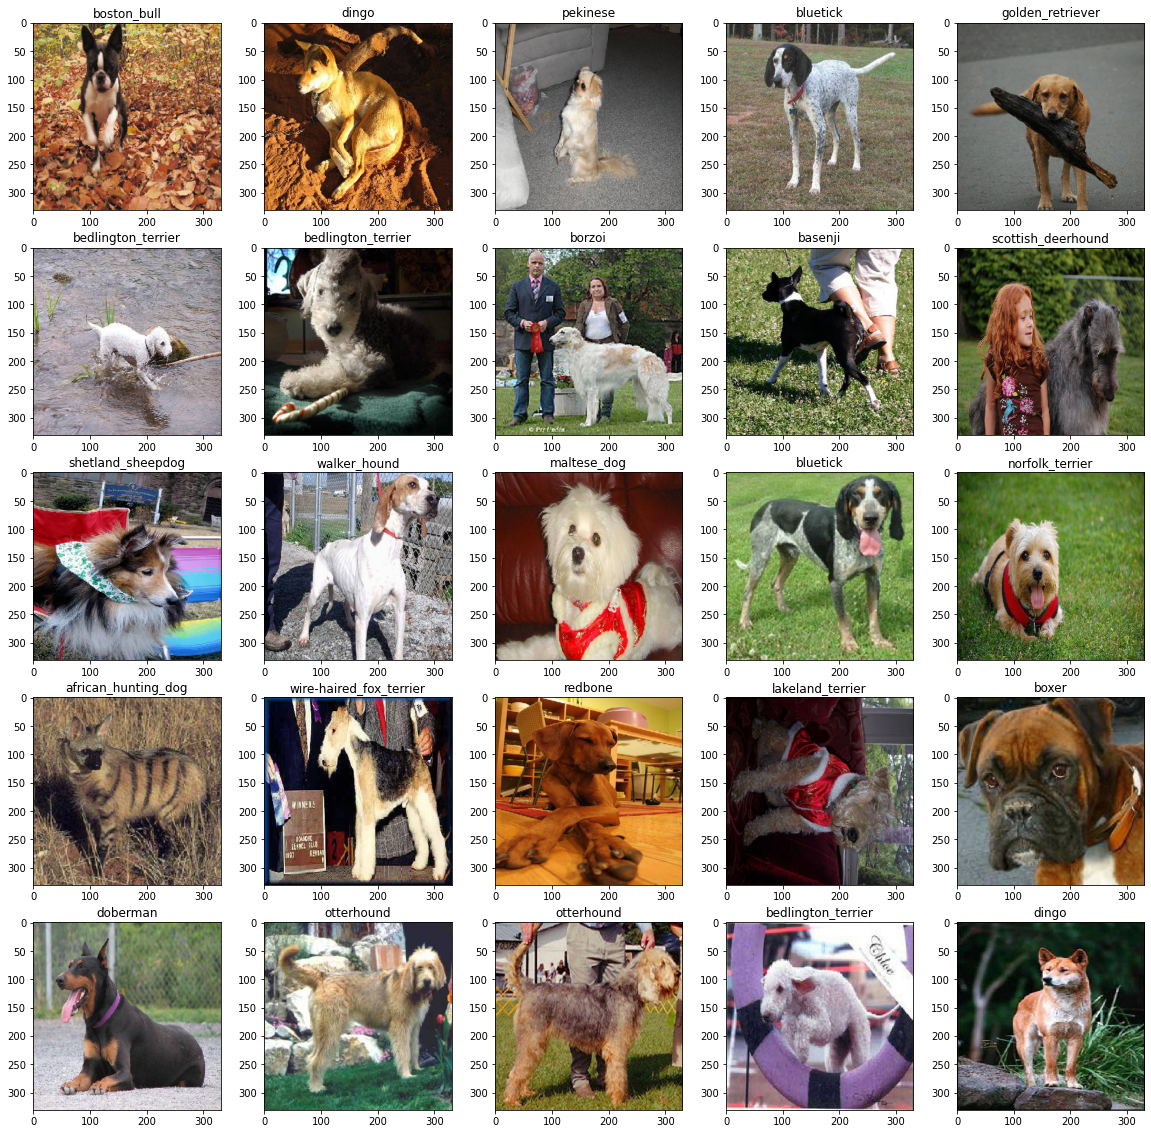

In [ ]:
n=25

# setup the figure 
plt.figure(figsize=(20,20))

for i in range(n):
#     print(i)
    ax = plt.subplot(5, 5, i+1)
    plt.title(classes[np.where(y[i] ==1)[0][0]])
    plt.imshow(X[i].astype('int32')) # .astype('int32') ---> as imshow() needs integer data to read the image

In [42]:
#Learning Rate Annealer
lrr= ReduceLROnPlateau(monitor='val_acc', factor=.01, patience=3, min_lr=1e-5,verbose = 1)

#Prepare call backs
EarlyStop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [2]:
batch_size= 128
epochs=50
learn_rate=.001
sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
adam=Adam(lr=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None,  amsgrad=False)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# Extract features using InceptionV3 
from keras.applications.inception_v3 import InceptionV3, preprocess_input
inception_preprocessor = preprocess_input
inception_features = get_features(InceptionV3,
                                  inception_preprocessor,
                                  img_size, X)

In [1]:
!pip install  keras.preprocessing.image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement keras.preprocessing.image (from versions: none)
ERROR: No matching distribution found for keras.preprocessing.image


In [46]:
!apt-get install  keras.preprocessing.image

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package keras.preprocessing.image
E: Couldn't find any package by glob 'keras.preprocessing.image'
E: Couldn't find any package by regex 'keras.preprocessing.image'


In [47]:
!pip install -U pip keras tensorflow



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 4.3 MB/s 
     |████████████████████████████████| 1.7 MB 39.4 MB/s 
     |████████████████████████████████| 588.3 MB 6.0 kB/s 
     |████████████████████████████████| 439 kB 53.2 MB/s 
     |████████████████████████████████| 6.0 MB 32.4 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.

In [48]:

import os
from google.colab import drive
MOUNTPOINT = "/content/gdrive"
DATADIR = os.path.join(MOUNTPOINT, "MyDrive")
drive.mount(MOUNTPOINT)

Mounted at /content/gdrive


In [49]:

import tensorflow as tf
 
checkpoint_path = DATADIR + "/checkpoints/cp-epoch-{epoch}.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [8]:
#function to extract features from the dataset by a given pretrained model
img_size = (331,331,3)

def get_features(model_name, model_preprocessor, input_size, data):

    input_layer = Input(input_size)
    preprocessor = Lambda(model_preprocessor)(input_layer)
    base_model = model_name(weights='imagenet', include_top=False,
                            input_shape=input_size)(preprocessor)
    avg = GlobalAveragePooling2D()(base_model)
    feature_extractor = Model(inputs = input_layer, outputs = avg)
    
    #Extract feature.
    feature_maps = feature_extractor.predict(data, verbose=1)
    print('Feature maps shape: ', feature_maps.shape)
    return feature_maps

In [6]:
# Extract features using InceptionV3 
from keras.applications.inception_v3 import InceptionV3, preprocess_input
inception_preprocessor = preprocess_input


In [26]:

a=[None, 331, 331, 3]
b=[None, 331, 331, 3]
c=[None, 331, 331, 3]
d=[None, 331, 331, 3]
X = np.empty((
    len(a), len(b), len(c), len(d), 4
))

In [30]:
# Extract features using Xception 

from keras.applications.xception import Xception, preprocess_input
xception_preprocessor = preprocess_input
xception_features = get_features(Xception,
                                 xception_preprocessor,
                                 img_size, X)

ValueError: ignored